In [2]:
# Header stuff that Jared usually includes
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('mesa') # To make plots look better

import random as rd

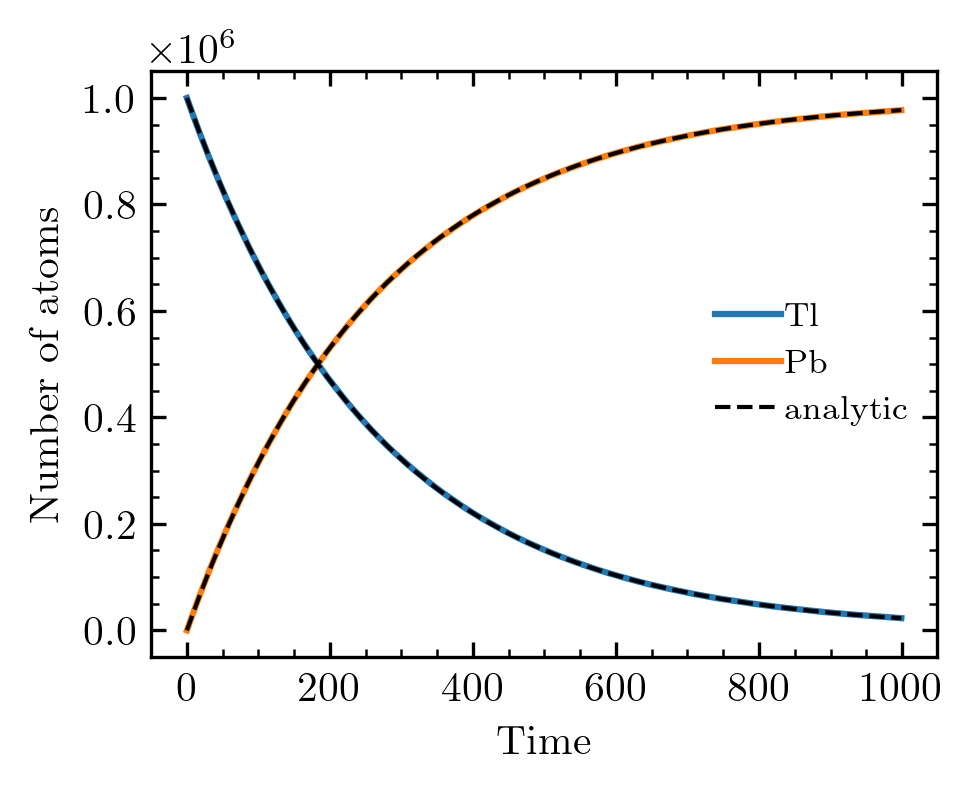

In [32]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl0 = 1000000
NTl = NTl0            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
fig, ax = plt.subplots()
ax.plot(tpoints,Tlpoints, label='Tl')
ax.plot(tpoints,Pbpoints, label='Pb')

ax.plot(tpoints, NTl0*(1 - 2**(-np.asarray(tpoints)/tau)), linestyle='dashed', color='black', label='analytic', linewidth=1)
ax.plot(tpoints, NTl0*(2**(-np.asarray(tpoints)/tau)), linestyle='dashed', color='black', linewidth=1)
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
# ax.set_xlim(0,1000)
plt.show()

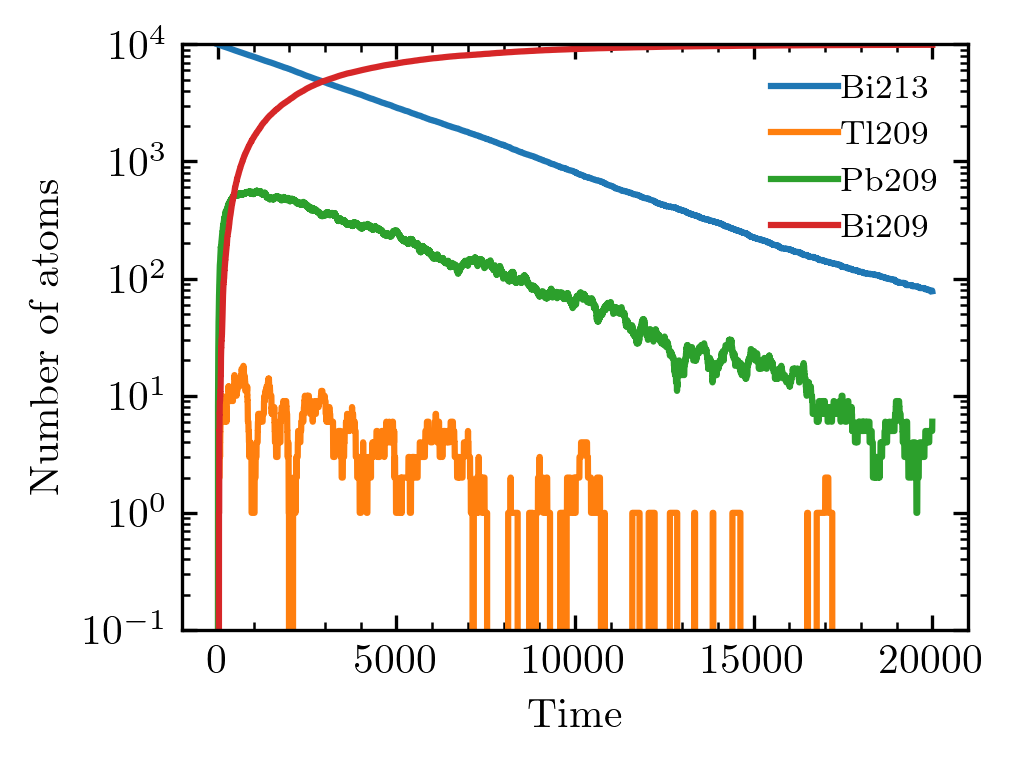

In [6]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi13 = 10000           # Number of Bismuth-213 atoms
NTl =  0              # Number of thallium atoms
NPb = 0               # Number of lead atoms
NBi09 = 0              # Number of stable Bi-209 atoms

tauBi = 46*60
tauTl = 2.2*60
tauPb = 3.3*60        # Half life of thallium in seconds

h = 1.0               # Size of time-step in seconds

pBi = 1 - 2**(-h/tauBi)   # Probability of Bi decay in one step
pTl = 1 - 2**(-h/tauTl)   # Probability of Tl decay in one step
pPb = 1 - 2**(-h/tauPb)   # Probability of Pb decay in one step

pBi13toTl = 0.0209

tmax = 20000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)

Bi13points = []
Tlpoints = []
Pbpoints = []
Bi09points = []

# Main loop
for t in tpoints:
    # Start the loop by adding what was determined at the end of the last loop
    Bi13points.append(NBi13)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi09points.append(NBi09)    

    # Calculate the number of atoms that decay Pb to Bi09
    decayPb = 0
    for i in range(NPb):
        if random()<pPb:
            decayPb += 1            
    NPb -= decayPb
    NBi09 += decayPb
    
    # Calculate number of atoms that decay from Tl to Pb
    decayTl = 0
    for i in range(NTl):
        if random()<pTl:
            decayTl += 1
    NTl -= decayTl
    NPb += decayTl
    
    # Calculate the number of atoms that decay from Bi to Tl OR Pb and match appropriately
    decayBi13toTl = 0
    decayBi13toPb = 0
    for i in range(NBi13):
        if random()<pBi:
            # Decide whether it becomes Tl or Pb
            if random() < pBi13toTl: 
                decayBi13toTl += 1
            else: 
                decayBi13toPb += 1
                
    NBi13 -= (decayBi13toTl + decayBi13toPb)
    NPb += decayBi13toPb
    NTl += decayBi13toTl
    
    
    
    
# Make the graph
fig, ax = plt.subplots()


ax.plot(tpoints,Bi13points, label='Bi213')
ax.plot(tpoints,Tlpoints, label='Tl209')
ax.plot(tpoints,Pbpoints, label='Pb209')
ax.plot(tpoints,Bi09points, label='Bi209')


ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
# ax.set_xlim(0,1000)
ax.set_ylim(0.1, 10000)
ax.set_yscale('log')
plt.show()

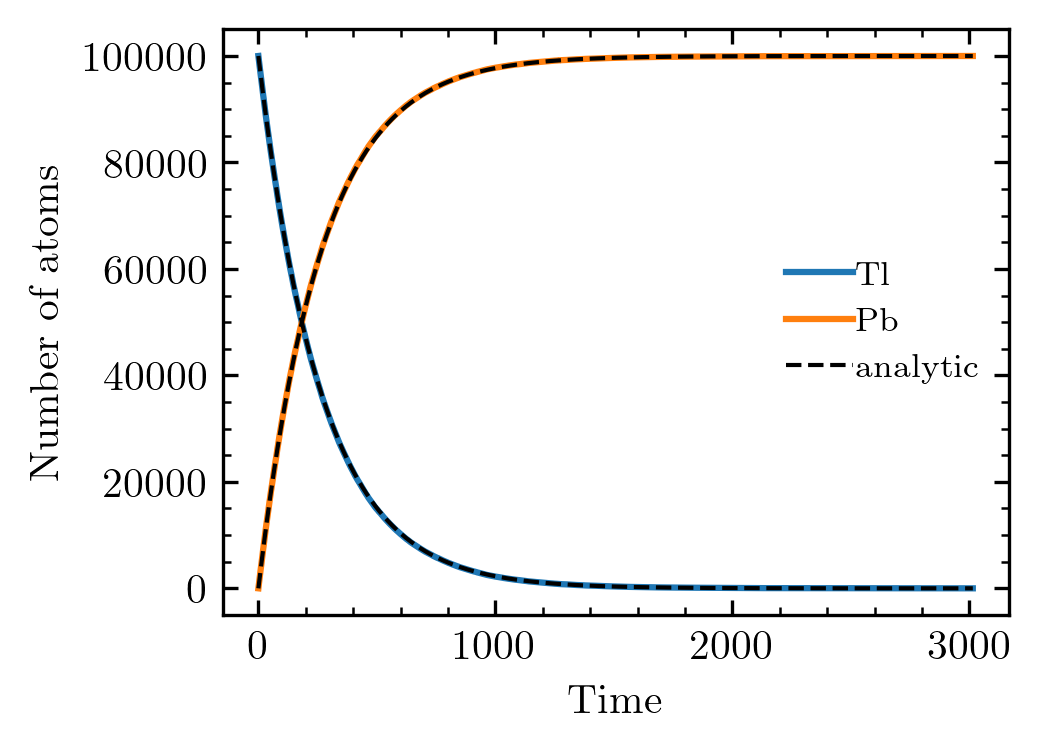

In [52]:
NTl = 100000
tau = 3.053*60

mu = np.log(2)/tau

t_dec_list = np.zeros(NTl)

for i in range(NTl): 
    z = random()
    t_dec = -1/mu*np.log(1-z)
    t_dec_list[i] = t_dec
    
t_dec_list = np.sort(t_dec_list)

NPb_list = np.arange(0,NTl)
NTl_list =  NTl - NPb_list


fig, ax = plt.subplots()
ax.plot(t_dec_list, NTl_list, label='Tl')
ax.plot(t_dec_list, NPb_list, label='Pb')

ax.plot(t_dec_list, NTl*(1 - 2**(-np.asarray(t_dec_list)/tau)), linestyle='dashed', color='black', label='analytic', linewidth=1)
ax.plot(t_dec_list, NTl*(2**(-np.asarray(t_dec_list)/tau)), linestyle='dashed', color='black', linewidth=1)

ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
ax.legend()
# ax.set_xlim(0,1000)
plt.show()

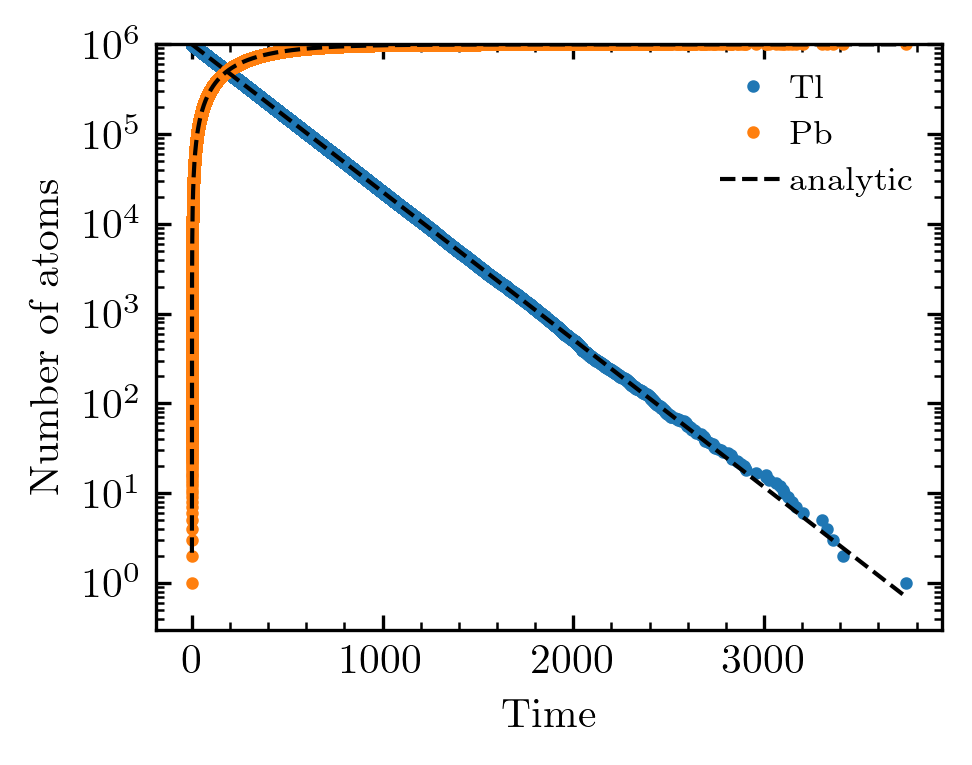

In [57]:
# An even more concise way, by generating a bunch of random values for z and using numpy

NTl = 1000000
tau = 3.053*60
mu = np.log(2)/tau

z = np.random.random(NTl)

t_dec = -1/mu*np.log(1-z) # Note that numpy log is ln 

t_dec_list = np.sort(t_dec)

NPb_list = np.arange(0,NTl)
NTl_list =  NTl - NPb_list


fig, ax = plt.subplots()
ax.plot(t_dec_list,NTl_list, label='Tl', marker='.', linestyle="None")
ax.plot(t_dec_list,NPb_list, label='Pb', marker='.', linestyle="None")

ax.plot(t_dec_list, NTl*(1 - 2**(-np.asarray(t_dec_list)/tau)), linestyle='dashed', color='black', label='analytic', linewidth=1)
ax.plot(t_dec_list, NTl*(2**(-np.asarray(t_dec_list)/tau)), linestyle='dashed', color='black', linewidth=1)

ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
ax.legend()
ax.set_ylim(0.3,NTl)
# ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [26]:
from math import sqrt,log,cos,sin,pi
from random import random
# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

# Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
    x,y = gaussian()
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E):
        count += 1

print(count,"particles were reflected out of",N)


1576 particles were reflected out of 1000000


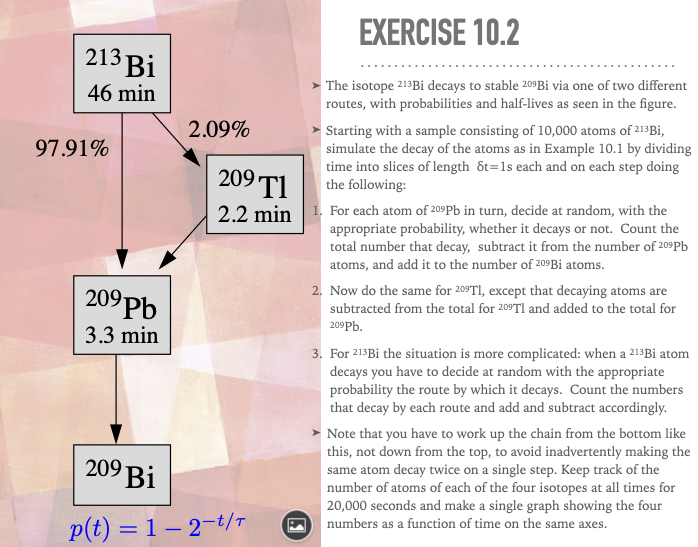

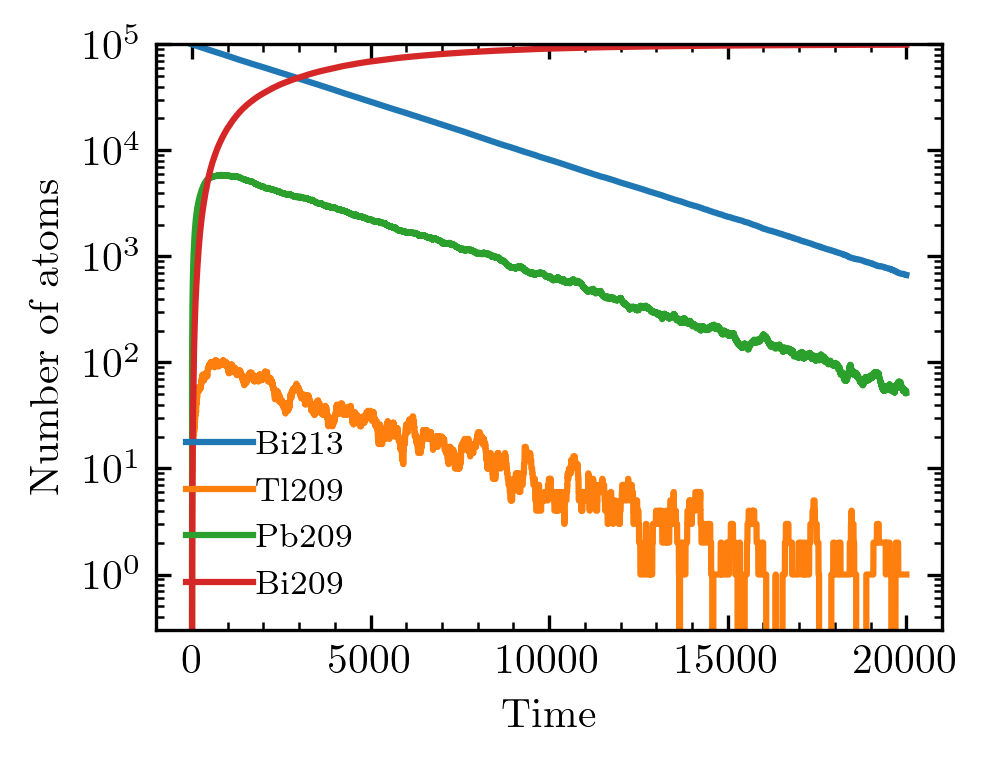

In [46]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi13 = 100000           # Number of Bismuth-213 atoms
NTl =  0              # Number of thallium atoms
NPb = 0               # Number of lead atoms
NBi09 = 0              # Number of stable Bi-209 atoms

tauBi = 46*60
tauTl = 2.2*60
tauPb = 3.3*60        # Half life of thallium in seconds

h = 1.0               # Size of time-step in seconds

pBi = 1 - 2**(-h/tauBi)   # Probability of Bi decay in one step
pTl = 1 - 2**(-h/tauTl)   # Probability of Tl decay in one step
pPb = 1 - 2**(-h/tauPb)   # Probability of Pb decay in one step

pBi13toTl = 0.0209

tmax = 20000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)

Bi13points = np.zeros(tmax)
Tlpoints = np.zeros(tmax)
Pbpoints = np.zeros(tmax)
Bi09points = np.zeros(tmax)

# Main loop
for i, t in enumerate(tpoints):
    # Start the loop by adding what was determined at the end of the last loop
    Bi13points[i] = NBi13
    Tlpoints[i] = NTl
    Pbpoints[i] = NPb
    Bi09points[i] = NBi09   

    # Calculate the number of atoms that decay Pb to Bi09
    decayPb = 0
    for i in range(NPb):
        if random()<pPb:
            decayPb += 1            
    NPb -= decayPb
    NBi09 += decayPb
    
    # Calculate number of atoms that decay from Tl to Pb
    decayTl = 0
    for i in range(NTl):
        if random()<pTl:
            decayTl += 1
    NTl -= decayTl
    NPb += decayTl
    
    # Calculate the number of atoms that decay from Bi to Tl OR Pb and match appropriately
    decayBi13toTl = 0
    decayBi13toPb = 0
    for i in range(NBi13):
        if random()<pBi:
            # Decide whether it becomes Tl or Pb
            if random() < pBi13toTl: 
                decayBi13toTl += 1
            else: 
                decayBi13toPb += 1
                
    NBi13 -= (decayBi13toTl + decayBi13toPb)
    NPb += decayBi13toPb
    NTl += decayBi13toTl
    
    
    
# Make the graph
fig, ax = plt.subplots()


ax.plot(tpoints,Bi13points, label='Bi213')
ax.plot(tpoints,Tlpoints, label='Tl209')
ax.plot(tpoints,Pbpoints, label='Pb209')
ax.plot(tpoints,Bi09points, label='Bi209')


ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
# ax.set_xlim(0,1000)
ax.set_ylim(0.3, 100000)
ax.set_yscale('log')
plt.show()

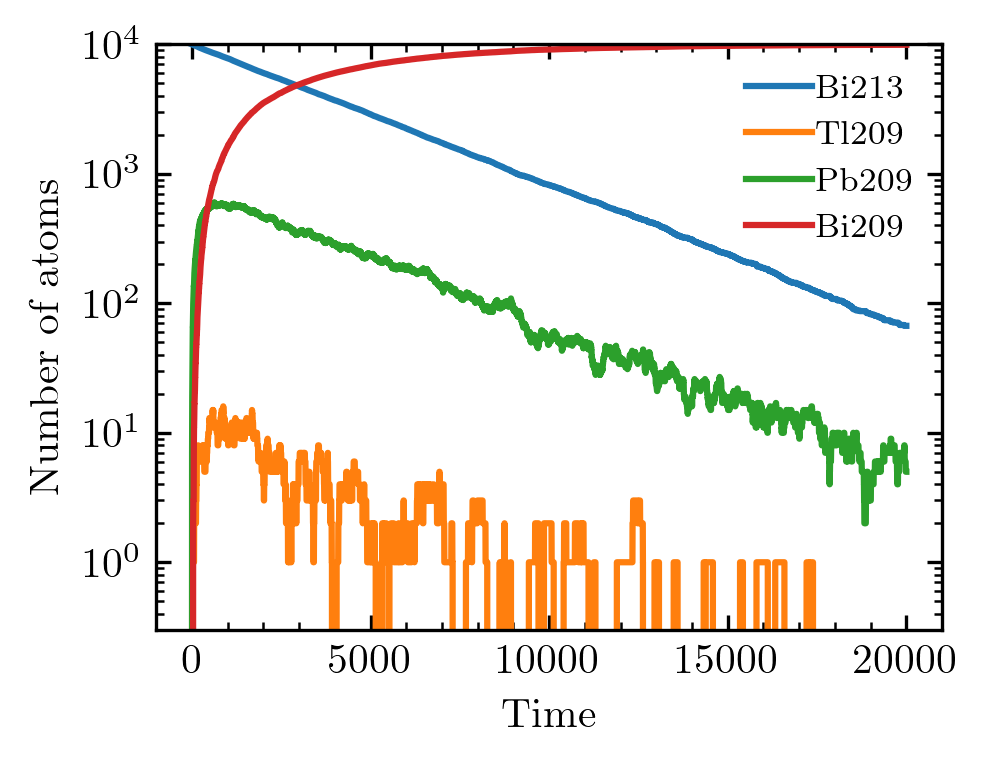

In [47]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi13 = 10000; NTl =  0; NPb = 0; NBi09 = 0;  # initial number of atoms
tauBi = 46*60; tauTl = 2.2*60; tauPb = 3.3*60;  # Half-lives for each atom

h = 1.0               # Size of time-step in seconds

pBi = 1 - 2**(-h/tauBi)   # Probability of Bi decay in one step
pBi13toTl = 0.0209
pBi13toPb = 1 -  pBi13toTl # 0.9791

pTl = 1 - 2**(-h/tauTl)   # Probability of Tl decay in one step
pPb = 1 - 2**(-h/tauPb)   # Probability of Pb decay in one step



tmax = 20000           # Total time
tpoints = np.arange(0.0,tmax,h)
Bi13points = np.zeros(tmax); 
Tlpoints = np.zeros(tmax); 
Pbpoints = np.zeros(tmax); 
Bi09points = np.zeros(tmax);

# Main loop
for i, t in enumerate(tpoints):
    # Start the loop by adding what was determined at the end of the last loop
    Bi13points[i] = NBi13
    Tlpoints[i] = NTl
    Pbpoints[i] = NPb
    Bi09points[i] = NBi09   

    # Calculate the number of atoms that decay Pb to Bi09
    decayPb = 0
    for i in range(NPb):
        if random()<pPb:
            decayPb += 1            
    NPb -= decayPb
    NBi09 += decayPb
    
    # Calculate number of atoms that decay from Tl to Pb
    decayTl = 0
    for i in range(NTl):
        if random()<pTl:
            decayTl += 1
    NTl -= decayTl
    NPb += decayTl
    
    # Calculate the number of atoms that decay from Bi to Tl OR Pb and match appropriately
    decayBi13toTl = 0
    decayBi13toPb = 0
    for i in range(NBi13):
        if random()<pBi: # Does this atom decay at all? 
            # Decide whether it becomes Tl or Pb
            if random() < pBi13toTl: 
                decayBi13toTl += 1
            else: 
                decayBi13toPb += 1
                
    NBi13 -= (decayBi13toTl + decayBi13toPb)
    NPb += decayBi13toPb
    NTl += decayBi13toTl
    
    
    
# Make the graph
fig, ax = plt.subplots()


ax.plot(tpoints,Bi13points, label='Bi213')
ax.plot(tpoints,Tlpoints, label='Tl209')
ax.plot(tpoints,Pbpoints, label='Pb209')
ax.plot(tpoints,Bi09points, label='Bi209')


ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Number of atoms")
# ax.set_xlim(0,1000)
ax.set_ylim(0.3, 10000)
ax.set_yscale('log')
plt.show()